In [1]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sn
import tensorflow as tf
from tensorflow import keras
from imblearn.over_sampling import SMOTE

In [3]:
df=pd.read_csv('/path/Telco-Customer-Churn.csv')
print(df.shape)
df.sample(5)  #Display four randomly selected rows

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6550,1309-BXVOQ,Male,0,Yes,No,21,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,106.10,2249.95,Yes
2600,2262-SLNVK,Female,0,No,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,No,Electronic check,70.10,70.1,No
1658,1228-FZFRV,Male,0,Yes,Yes,50,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,Month-to-month,No,Credit card (automatic),105.95,5341.8,Yes
4182,4902-OHLSK,Female,1,No,No,29,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,Month-to-month,No,Electronic check,98.65,2862.75,Yes
3337,0840-DFEZH,Female,0,No,No,7,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,75.35,564.65,No


In [4]:
df.drop('customerID',axis=1,inplace=True) #customerID is not useful
print(df.shape)
df.sample(3)

(7043, 20)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4536,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.35,69.35,Yes
4898,Female,0,No,No,3,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,No,Electronic check,25.25,58.9,Yes
6338,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.25,20.25,No


In [5]:
#Delete rows that have blank values
df1=df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [6]:
df1.dtypes

,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


In [7]:
#Converting the data type of the 'TotalCharges' column from an object to a numerical format
df1.TotalCharges=pd.to_numeric(df1.TotalCharges)

<ipython-input-7-7b391897e955>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges=pd.to_numeric(df1.TotalCharges)


In [8]:
df1.TotalCharges.dtype

dtype('float64')

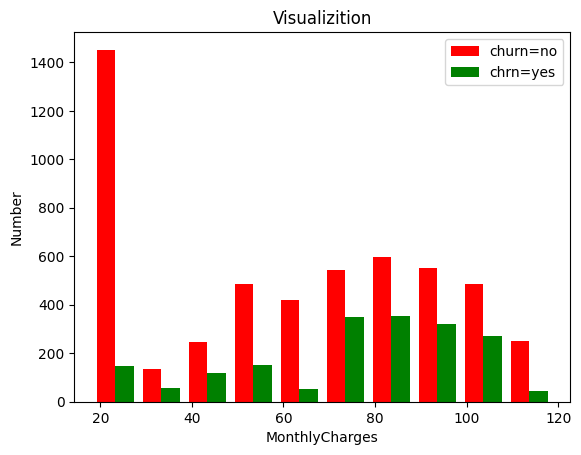

In [9]:
#Visualizition
Partner_Churn_no=df1[df1.Churn=='No'].MonthlyCharges
Partner_Churn_yes=df1[df1.Churn=='Yes'].MonthlyCharges
plt.xlabel('MonthlyCharges')
plt.ylabel('Number')
plt.title('Visualizition')
plt.hist([Partner_Churn_no,Partner_Churn_yes],color=['red','green'],label=['churn=no','chrn=yes'])
plt.legend()

In [10]:
def show_column(df1):
  for column in df1:
    if df1[column].dtype=='object':
      print(column)
      print(df1[column].unique())

show_column(df1)

gender
['Female' 'Male']
Partner
['Yes' 'No']
Dependents
['No' 'Yes']
PhoneService
['No' 'Yes']
MultipleLines
['No phone service' 'No' 'Yes']
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
['No' 'Yes' 'No internet service']
OnlineBackup
['Yes' 'No' 'No internet service']
DeviceProtection
['No' 'Yes' 'No internet service']
TechSupport
['No' 'Yes' 'No internet service']
StreamingTV
['No' 'Yes' 'No internet service']
StreamingMovies
['No' 'Yes' 'No internet service']
Contract
['Month-to-month' 'One year' 'Two year']
PaperlessBilling
['Yes' 'No']
PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn
['No' 'Yes']


In [11]:
df1.replace('No phone service','No',inplace=True)
df1.replace('No internet service','No',inplace=True)
print(df1.shape)
show_column(df1)

(7032, 20)
gender
['Female' 'Male']
Partner
['Yes' 'No']
Dependents
['No' 'Yes']
PhoneService
['No' 'Yes']
MultipleLines
['No' 'Yes']
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
['No' 'Yes']
OnlineBackup
['Yes' 'No']
DeviceProtection
['No' 'Yes']
TechSupport
['No' 'Yes']
StreamingTV
['No' 'Yes']
StreamingMovies
['No' 'Yes']
Contract
['Month-to-month' 'One year' 'Two year']
PaperlessBilling
['Yes' 'No']
PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn
['No' 'Yes']


<ipython-input-11-a18e58c299d7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)
<ipython-input-11-a18e58c299d7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)


In [12]:
yes_no_columns=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection',
'TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

In [13]:
dict_yes_no={'Yes':1,'No':0}
for col in yes_no_columns:
  df1[col].replace(dict_yes_no,inplace=True)
  print(col)
  print(df1[col].unique())

Partner
[1 0]
Dependents
[0 1]
PhoneService
[0 1]
MultipleLines
[0 1]
OnlineSecurity
[0 1]
OnlineBackup
[1 0]
DeviceProtection
[0 1]
TechSupport
[0 1]
StreamingTV
[0 1]
StreamingMovies
[0 1]
PaperlessBilling
[1 0]
Churn
[0 1]


<ipython-input-13-38d0363ce70f>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].replace(dict_yes_no,inplace=True)
<ipython-input-13-38d0363ce70f>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1[col].replace(dict_yes_no,inplace=True)
<ipython-input-13-38d0363ce70f>:3: SettingWithCopyWa

In [14]:
dict_fem_mal={'Female':1,'Male':0}
df1['gender'].replace(dict_fem_mal,inplace=True)
for col in df1:
  print(col)
  print(df1[col].unique())

gender
[1 0]
SeniorCitizen
[0 1]
Partner
[1 0]
Dependents
[0 1]
tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService
[0 1]
MultipleLines
[0 1]
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
[0 1]
OnlineBackup
[1 0]
DeviceProtection
[0 1]
TechSupport
[0 1]
StreamingTV
[0 1]
StreamingMovies
[0 1]
Contract
['Month-to-month' 'One year' 'Two year']
PaperlessBilling
[1 0]
PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges
[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn
[0 1]


<ipython-input-14-ef8637ea896e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['gender'].replace(dict_fem_mal,inplace=True)
<ipython-input-14-ef8637ea896e>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['gender'].replace(dict_fem_mal,inplace=True)
<ipython-input-14-ef8637ea896e>:2: Setti

In [15]:
df2=pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'],dtype=np.float64)
print(df2.shape)
df2.columns

(7032, 27)


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [16]:
for col in df2:
  print(col)
  print(df2[col].unique())

gender
[1 0]
SeniorCitizen
[0 1]
Partner
[1 0]
Dependents
[0 1]
tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService
[0 1]
MultipleLines
[0 1]
OnlineSecurity
[0 1]
OnlineBackup
[1 0]
DeviceProtection
[0 1]
TechSupport
[0 1]
StreamingTV
[0 1]
StreamingMovies
[0 1]
PaperlessBilling
[1 0]
MonthlyCharges
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges
[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn
[0 1]
InternetService_DSL
[1. 0.]
InternetService_Fiber optic
[0. 1.]
InternetService_No
[0. 1.]
Contract_Month-to-month
[1. 0.]
Contract_One year
[0. 1.]
Contract_Two year
[0. 1.]
PaymentMethod_Bank transfer (automatic)
[0. 1.]
PaymentMethod_Credit card (automatic)
[0. 1.]
PaymentMethod_Electronic check
[1. 0.]
PaymentMethod_Mailed check
[0. 1.]


In [17]:
df2.dtypes

,0
gender,int64
SeniorCitizen,int64
Partner,int64
Dependents,int64
tenure,int64
PhoneService,int64
MultipleLines,int64
OnlineSecurity,int64
OnlineBackup,int64
DeviceProtection,int64


In [18]:
scaler=MinMaxScaler()
colmns_to_scale=['tenure','MonthlyCharges','TotalCharges']
df2[colmns_to_scale]=scaler.fit_transform(df2[colmns_to_scale])

In [19]:
#count class
df2['Churn'].value_counts()

,count
Churn,
0,5163
1,1869


In [20]:
X=df2.drop('Churn',axis=1)
Y=df2['Churn']

In [21]:
smote=SMOTE(sampling_strategy='minority')
X_S,Y_S=smote.fit_resample(X,Y)

In [22]:
X_train,X_test,Y_train,Y_test=train_test_split(X_S,Y_S,test_size=0.2,random_state=5)

In [23]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(8260, 26)
(2066, 26)
(8260,)
(2066,)


In [38]:
#creating and training model
def my_model():
  model=keras.Sequential([
      keras.layers.Dense(26,input_shape=(26,),activation='relu'),
      keras.layers.Dense(100,activation='relu'),
      keras.layers.Dense(75,activation='relu'),
      keras.layers.Dense(50,activation='relu'),
      keras.layers.Dense(25,activation='relu'),
      keras.layers.Dense(1,activation='sigmoid')
  ])
  model.compile(
      optimizer='adam',
      loss=keras.losses.BinaryCrossentropy,
      metrics=['accuracy','precision','recall','f1_score']
  )
  return model

def eval(model,X,Y):
  model.evaluate(X,Y)

  #prediction
def prediction(model,X,Y):
  Y_predict=model.predict(X)
  Y_pred=[]
  for label in Y_predict:
    if label<0.5:
      Y_pred.append(0)
    else:
      Y_pred.append(1)
  print('predicted the five first labels:',Y_pred[:5])
  print('True label of first five elements:',Y[:5])
  return Y_pred


  #show classification report
def report(truth,predictions):
  print(classification_report(truth,predictions))
  #show confusion matrix
  cm=tf.math.confusion_matrix(labels=truth,predictions=predictions)
  plt.figure(figsize=(10,7))
  sn.heatmap(cm,annot=True,fmt='d')
  plt.xlabel('predicted')
  plt.ylabel('Truth')

def plot_loss(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()
    plt.show()

def plot_accuracy(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['accuracy'], label='Train accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation accuracy')
    plt.title('Training and Validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('accuracy')
    plt.legend()
    plt.grid()
    plt.show()

In [32]:
model=my_model()
history=model.fit(X_train,Y_train,epochs=40,validation_split=0.2)


Epoch 1/40


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


207/207 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7229 - f1_score: 0.6564 - loss: 0.5609 - precision: 0.6984 - recall: 0.7717 - val_accuracy: 0.7688 - val_f1_score: 0.6640 - val_loss: 0.4898 - val_precision: 0.7480 - val_recall: 0.8063
Epoch 2/40
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7859 - f1_score: 0.6579 - loss: 0.4490 - precision: 0.7580 - recall: 0.8275 - val_accuracy: 0.7724 - val_f1_score: 0.6640 - val_loss: 0.4764 - val_precision: 0.7469 - val_recall: 0.8197
Epoch 3/40
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7884 - f1_score: 0.6752 - loss: 0.4520 - precision: 0.7669 - recall: 0.8405 - val_accuracy: 0.7760 - val_f1_score: 0.6640 - val_loss: 0.4804 - val_precision: 0.7318 - val_recall: 0.8672
Epoch 4/40
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8011 - f1_score: 0.6746 - loss: 0.4273 - precision: 0.7842 - recall: 0.8403 - val_accuracy: 0.7700 - val_f1_score: 0.6640 - val_loss: 0.4818 - val_precision: 0.7647 - val_recall: 0.7759
Epo

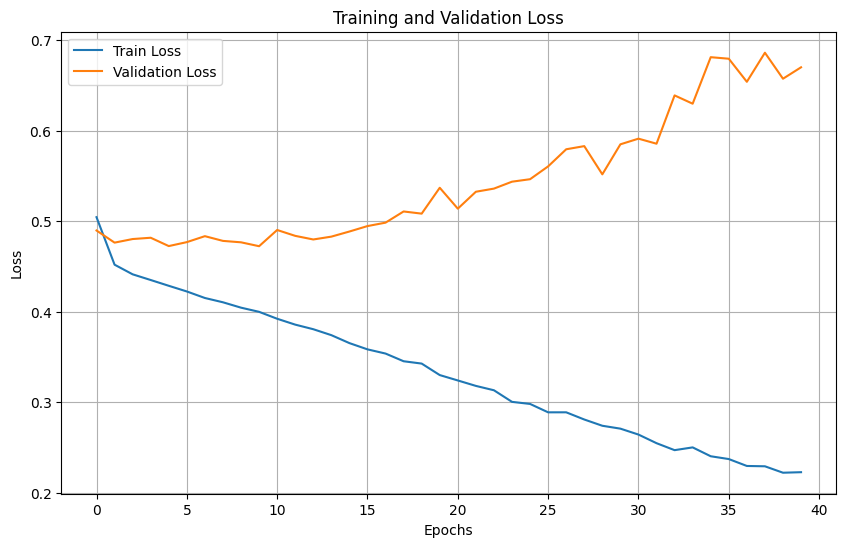

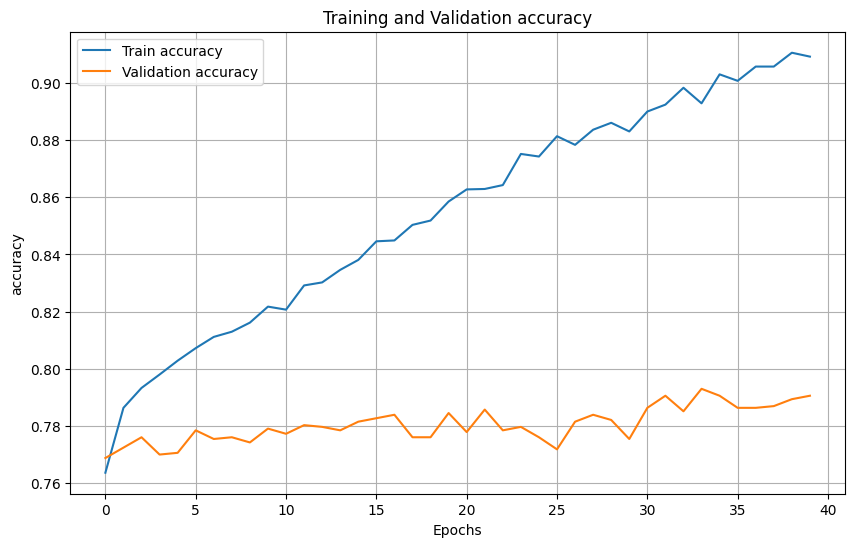

In [35]:
plot_loss(history)
plot_accuracy(history)

In [36]:
eval(model,X_test,Y_test)

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7753 - f1_score: 0.6921 - loss: 0.7241 - precision: 0.7679 - recall: 0.8049


In [39]:
preds=prediction(model,X_test,Y_test)

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
predicted the five first labels: [1, 0, 1, 0, 0]
True label of first five elements: 9238    1
6020    0
8112    1
2049    1
6185    0
Name: Churn, dtype: int64


              precision    recall  f1-score   support

           0       0.80      0.74      0.77      1025
           1       0.76      0.82      0.79      1041

    accuracy                           0.78      2066
   macro avg       0.78      0.78      0.78      2066
weighted avg       0.78      0.78      0.78      2066



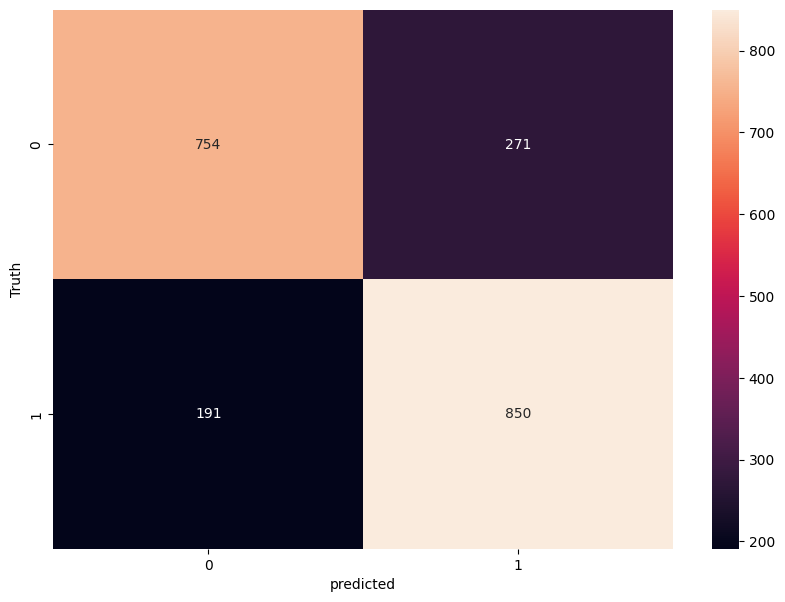

In [40]:
report(Y_test,preds)